In [2]:
#from gensim.models import Word2Vec
import numpy as np
import pandas as pd
import matplotlib as plot

In [3]:
pat_df = pd.read_csv('patient_disease_vector.csv') #Patients
#rep_df = pd.read_csv('patient_with_reports.csv') #Reports

In [4]:
pat_df.head(3)

,Unnamed: 0,SUBJECT_ID,0,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,17,18
0,0,249,0.0,0.000000,0.003799,0.189696,0.071951,0.000000,0.013072,0.275432,...,0.093745,0.091629,0.0,0.0,0.0,0.0,0.0,0.055828,0.026500,0.102564
1,1,250,0.0,0.012821,0.217949,0.000000,0.153846,0.000000,0.000000,0.141026,...,0.000000,0.064103,0.0,0.0,0.0,0.0,0.0,0.102564,0.217949,0.000000
2,2,251,0.0,0.000000,0.000000,0.000000,0.000000,0.266667,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.400000,0.333333


In [5]:
df = pat_df.loc[(pat_df['6']>0) | (pat_df['7']>0) | (pat_df['8']>0) | (pat_df['9']>0)]

In [6]:
pat_df = df

In [8]:
rep_df = pd.read_csv('patient_with_reports.csv') #Reports

In [9]:
rep_df.head(3)

,Unnamed: 0,SUBJECT_ID,HADM_ID,CATEGORY,DESCRIPTION,TEXT
0,0,22532,167853.0,Discharge summary,Report,admission date discharge date service addendum...
1,1,13702,107527.0,Discharge summary,Report,admission date discharge date date birth sex f...
2,2,13702,167118.0,Discharge summary,Report,admission date discharge date service cardioth...


In [10]:
rep_df = rep_df.dropna(subset=['TEXT'])

In [11]:
rep_df.TEXT.str.len().max()

34279

In [12]:
rep_df[rep_df['HADM_ID'].isnull()]

,Unnamed: 0,SUBJECT_ID,HADM_ID,CATEGORY,DESCRIPTION,TEXT
59687,308731,7809,NaN,Nursing,Nursing Progress Note,diabetic ketoacidosis dka assessment fs alert ...
59770,308829,31608,NaN,Nursing,Nursing Progress Note,respiratory failure acute last name assessment...
59796,308863,30137,NaN,Physician,Physician Attending Admission Note,chief complaint epistaxis saw examined patient...
59832,308902,29983,NaN,Nursing,Nursing Progress Note,diabetic ketoacidosis dka assessment bs stable...
60119,309243,31913,NaN,Physician,Physician Attending Progress Note,chief complaint respiratory failure saw examin...
60216,309354,31608,NaN,Nursing,Nursing Progress Note,respiratory failure acute last name assessment...
60230,309376,29552,NaN,Physician,Physician Resident Progress Note,chief complaint metastatic renal cell carcinom...
60236,309382,31608,NaN,Physician,Physician Attending Progress Note,chief complaint hypoxemic respiratory failure ...
60341,309501,7809,NaN,Nursing,Nursing Progress Note,diabetic ketoacidosis dka assessment fs alert ...
60429,309624,7809,NaN,Physician,Physician Resident Progress Note,chief complaint dka hour events blood cultured...


In [13]:
pat_combo_df = pd.read_csv('PatientCombo.csv')
print(pat_combo_df.shape)
print(pat_df.shape)
print(rep_df.shape)

(245449966, 3)
(37345, 21)
(1769507, 6)


In [14]:
pat_combo_df.values

array([[        0,       249,       249],
       [        1,       249,       250],
       [        2,       249,       251],
       ...,
       [245449963,     14666,     79285],
       [245449964,     14666,     79288],
       [245449965,     14666,     79292]])

In [15]:
a = rep_df['SUBJECT_ID'].values

In [16]:
patients_with_no_rep= pat_df.loc[~pat_df['SUBJECT_ID'].isin(a)].iloc[:,1]
b = patients_with_no_rep.values
patients_with_no_rep

3854      2987
7954      9145
15536    17450
19349    22994
22530    27802
24187    62361
24310    57032
24360    63167
24446    59498
24507    54124
25189    46523
25493    49613
25522    49763
25568    74566
25977    63339
26026    43158
26173    64124
26190    64192
26216    64287
26395    76603
26399    70496
26790    46651
26793    46659
26798    46671
26960    61717
26985    61828
27021    57654
27060    70686
27142    44207
27682    57875
         ...  
44588    68529
44592    91978
44650    92227
44651    92233
44673    72813
44740    94589
44742    94594
44828    80538
44855    80644
44892    70919
44900    70950
44952    71142
44982    71260
45055    44742
45240    66504
45377    88191
45394    88252
45487    88569
45548    82419
45571    82497
45588    82556
45690    77062
45828    75969
45855    76035
46004    96892
46179    84406
46316    70125
46361    70304
46370    70334
46427    43735
Name: SUBJECT_ID, Length: 261, dtype: int64

In [17]:
pat_df = pat_df.loc[~pat_df['SUBJECT_ID'].isin(b)]

In [23]:
df= rep_df['SUBJECT_ID'].value_counts()
df = df.rename_axis('Patient ID').reset_index(name='No of Reports')
df.head(5)

,Patient ID,No of Reports
0,55672,1166
1,77614,1134
2,109,1110
3,20082,1089
4,27427,1078


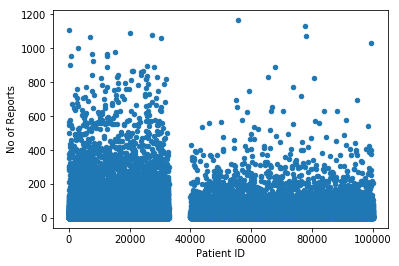

In [24]:
df.plot.scatter(x='Patient ID',y='No of Reports')

In [20]:
df2= df.loc[(df['frequency']<=400) & (df['frequency']>=100)]
df2.head(3)

,patient_id,frequency
355,1307,400
356,4113,399
357,10156,399


In [21]:
print(df2.shape)
print(rep_df['SUBJECT_ID'].unique().shape)
print(pat_df.shape)
df2 = df2['patient_id'].values

(3691, 2)
(46127,)
(37084, 21)


In [15]:
pat_df = pat_df.loc[pat_df['SUBJECT_ID'].isin(df2)]
pat_df.shape

(16723, 21)

In [16]:
pat_df.head(3)

,Unnamed: 0,SUBJECT_ID,0,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,17,18
0,0,249,0.0,0.000000,0.003799,0.189696,0.071951,0.000000,0.013072,0.275432,...,0.093745,0.091629,0.0,0.0,0.0,0.0,0.0,0.055828,0.026500,0.102564
1,1,250,0.0,0.012821,0.217949,0.000000,0.153846,0.000000,0.000000,0.141026,...,0.000000,0.064103,0.0,0.0,0.0,0.0,0.0,0.102564,0.217949,0.000000
3,3,252,0.0,0.031746,0.000000,0.070106,0.192857,0.047619,0.194444,0.079894,...,0.103439,0.046296,0.0,0.0,0.0,0.0,0.0,0.115873,0.022487,0.070106


In [17]:
sub_ids=pat_df['SUBJECT_ID'].values
sub_ids.shape

(16723,)

In [18]:
x = np.random.shuffle(sub_ids)

In [19]:
x = sub_ids
y = x
b = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])

In [24]:
len(x)

16723

In [23]:
import pickle


with open('400PatComboArr25.pickle', 'wb') as handle:
    pickle.dump(b, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
from itertools import product

c = product(sub_ids,sub_ids)

In [19]:
c = list(c)

In [4]:
c

[(249, 249),
 (249, 250),
 (249, 251),
 (249, 252),
 (249, 253),
 (249, 256),
 (249, 258),
 (249, 260),
 (249, 261),
 (249, 263),
 (249, 265),
 (249, 267),
 (249, 268),
 (249, 269),
 (249, 270),
 (249, 663),
 (249, 664),
 (249, 665),
 (249, 667),
 (249, 668),
 (249, 670),
 (249, 671),
 (249, 674),
 (249, 676),
 (249, 677),
 (249, 678),
 (249, 679),
 (249, 682),
 (249, 685),
 (249, 686),
 (249, 689),
 (249, 690),
 (249, 692),
 (249, 694),
 (249, 695),
 (249, 697),
 (249, 698),
 (249, 699),
 (249, 702),
 (249, 704),
 (249, 705),
 (249, 707),
 (249, 708),
 (249, 709),
 (249, 710),
 (249, 713),
 (249, 715),
 (249, 716),
 (249, 717),
 (249, 719),
 (249, 720),
 (249, 721),
 (249, 723),
 (249, 726),
 (249, 727),
 (249, 728),
 (249, 729),
 (249, 730),
 (249, 731),
 (249, 733),
 (249, 734),
 (249, 735),
 (249, 736),
 (249, 738),
 (249, 739),
 (249, 740),
 (249, 742),
 (249, 743),
 (249, 745),
 (249, 747),
 (249, 749),
 (249, 750),
 (249, 751),
 (249, 754),
 (249, 755),
 (249, 757),
 (249, 759),

In [5]:
c = np.array(c)
c

array([[  249,   249],
       [  249,   250],
       [  249,   251],
       ...,
       [44128, 44084],
       [44128, 44126],
       [44128, 44128]])

In [ ]:
c.shape

In [3]:
import pickle

with open('PatComboList.pickle', 'rb') as handle :
   c = pickle.load(handle)

In [6]:
import pickle


with open('PatComboArr.pickle', 'wb') as handle:
    pickle.dump(c, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [21]:
dataset = pd.DataFrame({'Pat1':c[:,0],'Pat2':c[:,1]})
#dataset =  dataset.iloc[:10000,:]

In [ ]:
dataset.to_csv('PatientCombo.csv')

In [32]:
for row in pat_df.itertuples():
    print(row[2])
    break

249


In [36]:
vect = {row[2]: gen_matrix(row[2]) for row in pat_df.itertuples()}

/home/nachiket/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [37]:
import pickle


with open('PatReportVectAverage.pickle', 'wb') as handle:
    pickle.dump(vect, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [39]:
import pickle

with open('PatReportVectAverage.pickle', 'rb') as handle :
   vect = pickle.load(handle)

In [40]:
vect

{249: array([[ 0.86433648,  0.44195612,  0.28470207, ..., -0.56747635,
          2.39514804,  0.24824471],
        [ 0.06293575, -0.26960435, -0.12205257, ...,  0.55533705,
          1.68541682, -0.00241445],
        [-0.10533654,  0.03541162, -0.05673572, ..., -0.22982656,
         -1.4706012 , -0.0776263 ],
        ...,
        [-0.24995044, -0.48878063, -0.38429549, ..., -0.06778855,
         -2.34640241, -0.52183881],
        [ 0.27874026,  0.11927279,  0.14674922, ..., -0.28158138,
         -1.15072145,  0.19372173],
        [ 0.17160411,  0.21113372,  0.0154913 , ...,  0.2064434 ,
         -0.58729172, -0.16069505]]),
 250: array([[ 0.40673931,  1.83971452,  0.11935601, ...,  0.00571519,
          0.08252214,  0.02920433],
        [ 0.12846969,  0.74103466,  0.95679112, ...,  0.10960329,
         -0.44363808, -0.25664435],
        [-0.23774793,  0.27748674, -0.24737256, ..., -0.72747365,
         -0.60869741,  0.14256001],
        ...,
        [-0.4282933 ,  0.10583396,  0.019588

In [41]:
def pad_zeros(vect,max_zeros=400):
    for key in vect.keys():
        curr_array = vect[key]
        curr_array = np.asarray(curr_array)
        if(curr_array.shape[1]<400):
            zeros = np.zeros((300,(400-curr_array.shape[1])))
            #print(curr_array.shape)
            #print(zeros.shape)
            curr_array = np.concatenate([curr_array,zeros],axis=1)
        vect[key] = curr_array
    return vect
            
new_vect = pad_zeros(vect)

In [42]:
import pickle


with open('NewPatReportMatrix.pickle', 'wb') as handle:
    pickle.dump(new_vect, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [1]:
import pickle

with open('NewPatReportMatrix.pickle', 'rb') as handle :
   new_vect = pickle.load(handle)

EOFError: Ran out of input

In [5]:
X1 = []
X2 = []
for row in pat_combo_df.itertuples():
    X1.append(new_vect[row[2]])
    X2.append(new_vect[row[3]])
    #print(row[2],row[3],vect[row[2]].shape,vect[row[3]].shape)

#print(len(X1))
#print(len(X2))

In [47]:
len(X1)

10000

In [83]:
with open('PatY.pickle', 'wb') as handle:
    pickle.dump(Y, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
import pickle

with open('PatY.pickle', 'rb') as handle :
   Y = pickle.load(handle)

In [7]:
X1 = np.asarray(X1)
X2 = np.asarray(X2)


In [8]:
Y1 = np.asarray(Y)

In [12]:
X11.shape

(10000, 300, 600)

In [13]:
X11 = np.resize(X11,(10000,300,600,1))
X222 = np.resize(X22,(10000,300,600,1))

In [ ]:
print(X111.shape)
print(X222.shape)

In [105]:
#X11 = np.resize(X11,(10000,300,100,1))
Y1 = np.asarray(Y)

In [17]:
from keras.layers import Dense, Input, Dropout, Activation
from keras.layers import Conv2D,GlobalMaxPooling2D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense,merge,Lambda,Flatten
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.layers.merge import concatenate
import keras.backend as K

dim=300
filter_size=64
ksize=5

#Model1
inp1 = Input(shape=(dim,600,1))
x1 = Conv2D(filter_size, kernel_size=(dim,ksize) ,padding='valid', kernel_initializer='normal')(inp1)
x2 = GlobalMaxPooling2D()(x1)

#Model2
inp2 = Input(shape=(dim,600,1))
y1 = Conv2D(filter_size, kernel_size=(dim,ksize) ,padding='valid', kernel_initializer='normal')(inp2)
y2 = GlobalMaxPooling2D()(y1)

#Model3
merged = concatenate([x2,y2])
out = Dense(19, activation="softmax")(merged)
model = Model(inputs=[inp1,inp2], outputs=out)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])
model.summary()

#Checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

history=model.fit([X11,X222],Y1,validation_split=0.3, epochs=10, batch_size=64, callbacks=callbacks_list, verbose=1)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 300, 600, 1)  0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            (None, 300, 600, 1)  0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 1, 596, 64)   96064       input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 1, 596, 64)   96064       input_8[0][0]                    
__________________________________________________________________________________________________
global_max

KeyboardInterrupt: 

In [ ]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Conv1D
from keras.layers import Bidirectional, GlobalAveragePooling1D,GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
import matplotlib.pyplot as plt
from keras.layers import Dense,merge
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.layers.merge import concatenate


dim=300

#model1
inp1 = Input(shape=(dim,600))
x2 = Bidirectional(GRU(64, return_sequences=True))(inp1)
x3 = GlobalAveragePooling1D()(x2)

#model2
inp2 = Input(shape=(dim,600))
z2 = Bidirectional(GRU(64, return_sequences=True))(inp2)
z3 = GlobalAveragePooling1D()(z2)

merged = concatenate([x3,z3])
y1 = Dense(256, activation='relu')(merged)
out = Dense(19, activation="softmax")(y1)
model = Model(inputs=[inp1,inp2], outputs=out)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

#Checkpoint
filepath="weights-GRU.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# Fit model on training data
history=model.fit([X1,X2],Y1,validation_split=0.3, epochs=10, batch_size=64, callbacks=callbacks_list, verbose=1)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 300, 600)     0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 300, 600)     0                                            
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 300, 128)     255360      input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 300, 128)     255360      input_2[0][0]                    
_____________________________________

In [33]:
embedding = Word2Vec.load('mimic-300D-3.5M.bin')        

In [34]:
mat_df = rep_df.loc[rep_df['SUBJECT_ID']==209]

In [35]:
def gen_vector(record):
    vector = np.zeros(300)
    if type(record) != str:
        print(record)
    record = record.split(' ')
    
    for word in record:
        vector += embedding[word]
    return vector/len(record)
def gen_matrix(sub_id):
    mat_df = rep_df.loc[rep_df['SUBJECT_ID']==sub_id]
    c = []
    for row in mat_df.itertuples():
        p = gen_vector(row[6])
        c.append(p)
    return np.asarray(c).T
c = gen_matrix(209)
c

/home/nachiket/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[ 0.81556843,  0.89766045,  0.22938068, ..., -0.51715331,
         0.24251839, -0.68409987],
       [ 0.01768021,  0.19110212, -0.50624094, ...,  0.03628547,
        -0.45162294, -0.91061043],
       [ 0.14756035,  0.2010016 , -0.06452885, ..., -0.21965827,
        -0.20523489, -0.62445642],
       ...,
       [-0.48004551, -0.2322377 , -0.4219478 , ..., -0.49417768,
        -0.52258562, -0.67610683],
       [ 0.01925142,  0.21199648,  0.29820384, ..., -0.11385168,
        -0.03650524,  0.17231529],
       [ 0.40530531,  0.14829806, -0.0735358 , ..., -0.23857652,
         0.13811157,  0.19600452]])

In [37]:
vect['209']

NameError: name 'vect' is not defined

In [ ]:
rep_df.head(3)

In [ ]:
patients = pat_df.SUBJECT_ID